In [1]:
# import packages
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# import stores data
with open('stores.json') as f:
    stores = json.load(f)
# convert to the data frame
stores = pd.DataFrame(stores)
# stores.head() # data

# import price data
price = pd.read_csv('../CompetitiveRetail/prices.csv')  
# price.head() # data

# import auditor data
auditor = pd.read_csv('../CompetitiveRetail/auditors.csv')  
# auditor.head() # data

In [3]:
# merge store and price data by the store ID 
df_col = pd.merge(stores, price, on='Store ID')
# merge previous data with auditor data by auditor ID
df = pd.merge(df_col, auditor, on='Auditor ID')
# drop the last col which is aduitor's region, it get less confuse with the price region
df = df.drop(['Region_y'], axis=1) 
# change the region_x to the region
df = df.rename(columns={"Region_x": "Region"})
df.head()

,Banner,Region,Store ID,Auditor ID,Date,Price,UPC,First,Last
0,Walmart,Northern California,66999,234,10/18/17,24.95,268588472,Sue,Smith
1,Walmart,Northern California,66999,234,10/27/17,49.71,475245085,Sue,Smith
2,Walmart,Northern California,66999,234,10/20/17,25.75,126967843,Sue,Smith
3,Walmart,Northern California,66999,234,10/23/17,18.81,708930835,Sue,Smith
4,Walmart,Northern California,66999,234,10/23/17,33.32,325885139,Sue,Smith


In [4]:
# create the cross table
tab = pd.crosstab([df.Banner, df.UPC], df.Region,values=df.Price, aggfunc='mean',colnames=['index'])
# reset the index
tabs = tab.reset_index()
# change the col order 
columnsTitles = ['Banner', 'UPC', 'Northern California','New York','Kansas','Texas']
# reindex the data
tabs = tabs.reindex(columns=columnsTitles)
# sort the data by the ascending the UPC number
tabs = tabs.sort_values(by=['UPC'])
tabs.head()

index,Banner,UPC,Northern California,New York,Kansas,Texas
0,Safeway,11873171,6.09,NaN,NaN,5.19
1953,Walmart,11873171,5.53,NaN,NaN,4.75
3934,Whole Foods,11873171,NaN,5.69,1.99,5.49
977,Trader Joes,11873171,NaN,NaN,NaN,4.99
2938,Wegmans,11873171,NaN,5.19,NaN,5.09


In [12]:
# save to the csv file
tabs.to_csv("output.csv", index=False)

In [5]:
tabs.head()

index,Banner,UPC,Northern California,New York,Kansas,Texas
0,Safeway,11873171,6.09,NaN,NaN,5.19
1953,Walmart,11873171,5.53,NaN,NaN,4.75
3934,Whole Foods,11873171,NaN,5.69,1.99,5.49
977,Trader Joes,11873171,NaN,NaN,NaN,4.99
2938,Wegmans,11873171,NaN,5.19,NaN,5.09


In [6]:
tabs.describe()

index,UPC,Northern California,New York,Kansas,Texas
count,4.931000e+03,1634.000000,3025.000000,3087.000000,3765.000000
mean,5.088255e+08,35.437907,30.971137,21.390198,30.084550
std,2.878944e+08,19.586411,17.219599,18.610435,16.709557
min,1.187317e+07,0.690000,0.590000,0.690000,0.590000
25%,2.661121e+08,19.177500,16.790000,1.990000,16.290000
50%,5.090565e+08,34.840000,30.720000,17.690000,29.840000
75%,7.644589e+08,51.590000,45.190000,37.490000,44.060000
max,9.991851e+08,74.490000,66.090000,59.990000,63.890000


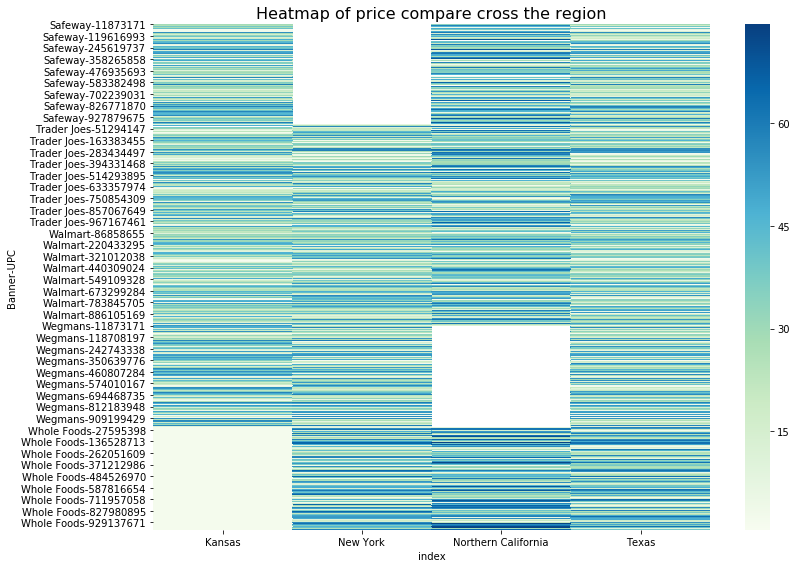

In [8]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
sns.heatmap(tab, cmap="GnBu", cbar=True)
ax.set_title("Heatmap of price compare cross the region",fontsize = 16)
plt.tight_layout()
plt.show()

From the data we can see Northern California average of product price is higher than Kansas, New York and Texas. There have an anomalies phenomenon at 25th percentails, Kansas has price at 1.99 which way lower than other States that price around 16 till 19.There may have data input mistake or something need noticed.
From the heatmap we can see there doesnt have wholefoods data in Knasas, safeway in New York, and Wegmans in Northern California.There may have missing data or there doesnt have those retail in that State, we need to confirm.